In [ ]:
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model
Imip=load_model('/content/drive/My Drive/IoTDemo/imbestmodel.h5')

In [ ]:
Imip.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
_______________________________________________________________________________________

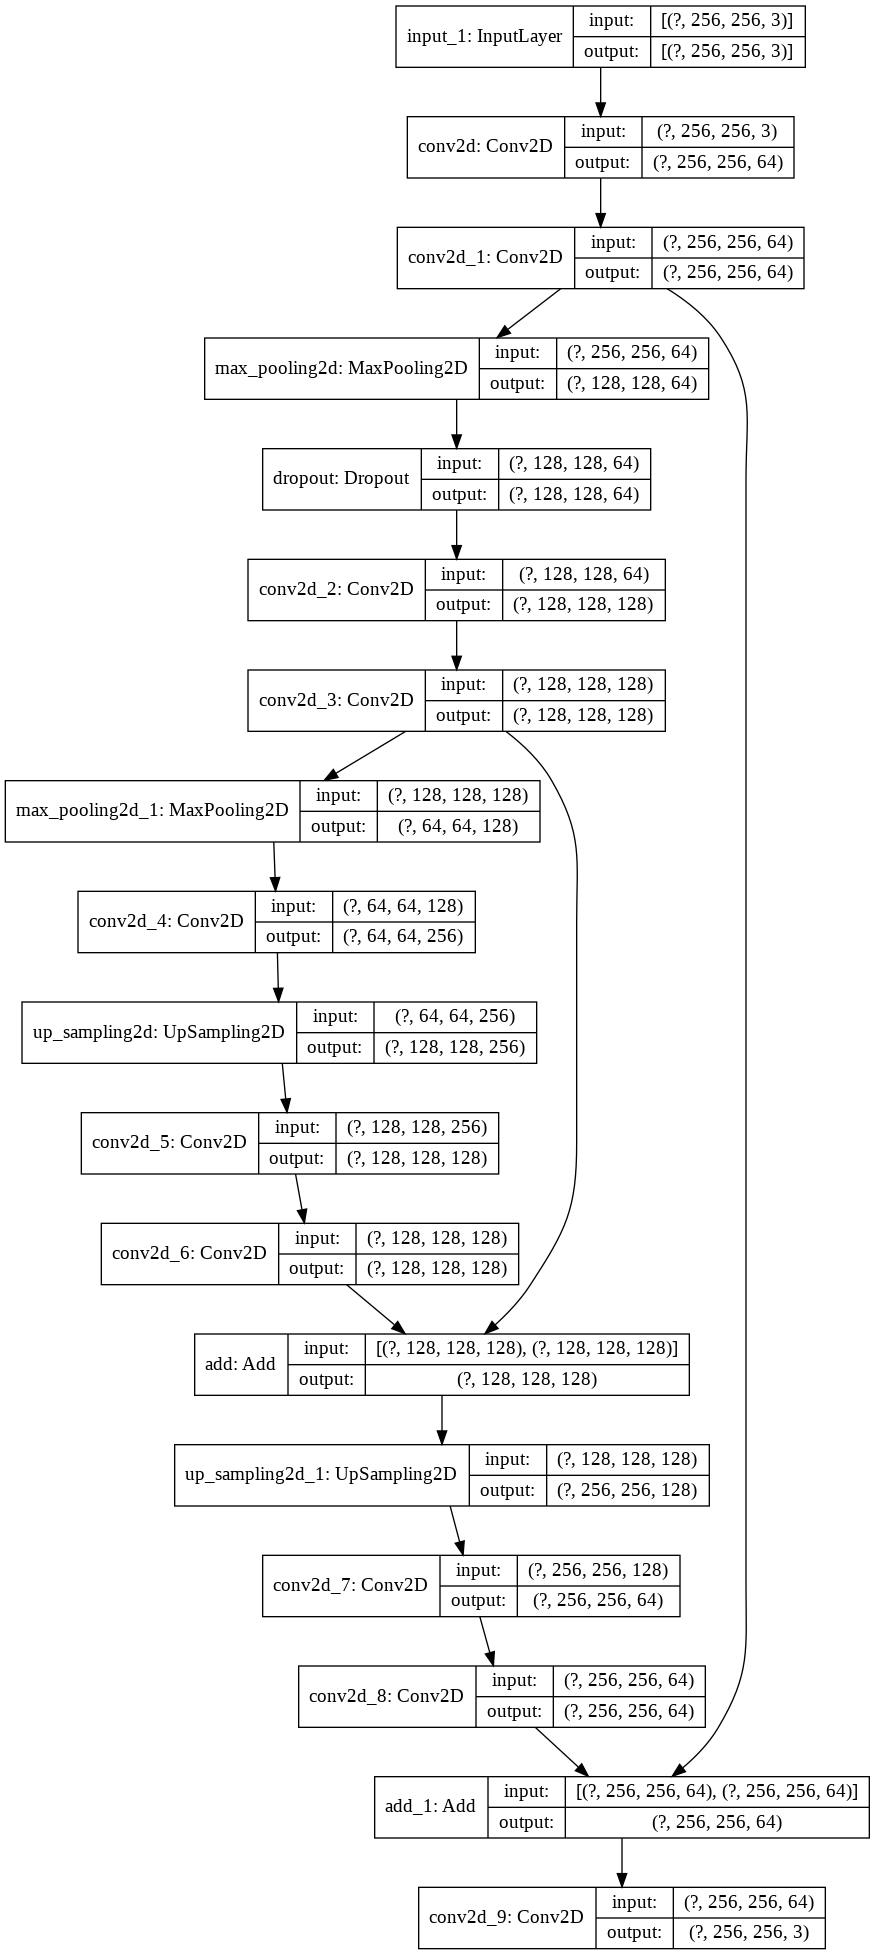

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(Imip, to_file='/content/drive/My Drive/IoTDemo/imip_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from matplotlib import image
from skimage.transform import resize, rescale
import cv2
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_ubyte

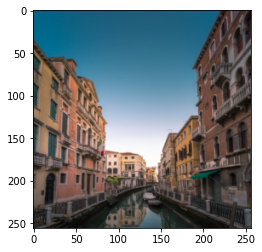

In [ ]:
testimg_data = image.imread('/content/drive/My Drive/DIV2K_train_HR/0699.png')
testimage_resized = resize(testimg_data, (256, 256))
plt.imshow(testimage_resized)

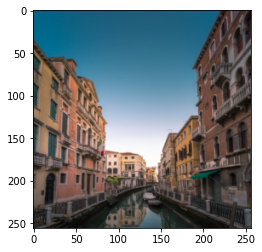

In [ ]:
testimg_data=img_as_ubyte(testimg_data)
plt.imshow(testimage_resized)

In [ ]:
def create_mask(img):
  mask = np.full((256,256,3), 0, np.uint8)
  for _ in range(np.random.randint(1, 10)):
    x1, x2 = np.random.randint(1, 256), np.random.randint(1, 256)
    y1, y2 = np.random.randint(1, 256), np.random.randint(1, 256)
    thickness = 7
    cv2.line(mask,(x1,y1),(x2,y2),(255,255,255),thickness)
  masked_image = img.copy()
  image_resized = resize(masked_image, (256, 256))
  return img_as_ubyte(image_resized), mask

In [ ]:
img,mask=create_mask(testimage_resized)

In [ ]:
maskedtest=cv2.bitwise_or(img,mask)

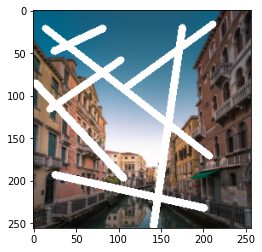

In [ ]:
plt.imshow(maskedtest)

In [ ]:
import tensorflow as tf
testimg=tf.expand_dims(maskedtest, axis=0)

In [ ]:
testimg.shape

TensorShape([1, 256, 256, 3])

In [ ]:
testimp=Imip.predict(testimg)

In [ ]:
testout=tf.keras.backend.squeeze(testimp, axis=0)

In [ ]:
final=testout.numpy()

In [ ]:
final=final.astype(int)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


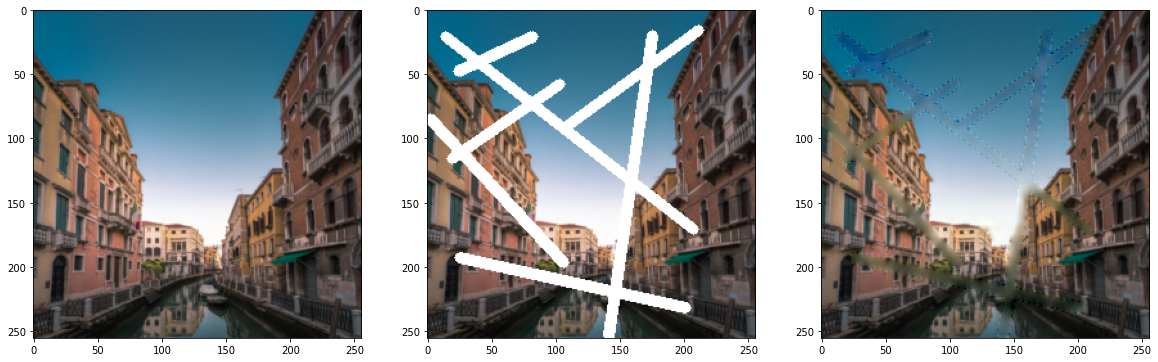

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(testimage_resized)
plt.subplot(1,3,2)
plt.imshow(maskedtest)
plt.subplot(1,3,3)
plt.imshow(final)

In [ ]:
from skimage.measure import compare_ssim

In [ ]:
#Structural Similarity Index Between Original HR and LR Images
(score, diff) = compare_ssim(testimage_resized,testimage_resized, full=True,multichannel=True)
diff = (diff * 255).astype("uint8")
print("SSIM of Original vs Original : {}".format(score))

SSIM of Original vs Original : 1.0


In [ ]:
(score1, diff1) = compare_ssim(testimage_resized,maskedtest, full=True,multichannel=True)
diff1 = (diff1 * 255).astype("uint8")
print("SSIM of Original HR vs Masked: {}".format(score1))

SSIM of Original HR vs Masked: 0.00015637780448368642


In [ ]:
(score2, diff2) = compare_ssim(testimage_resized,final, full=True,multichannel=True)
diff2 = (diff2 * 255).astype("uint8")
print("SSIM of Original vs Image Inpainting Output: {}".format(score2))

SSIM of Original vs Image Inpainting Output: 0.0013023789022531054
